In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
places_df1 = pd.read_csv('data/places_include_distance.csv')
places_df2 = pd.read_csv('data/places_include_distance2.csv')
places_df = pd.concat([places_df1, places_df2], ignore_index=True)
places_df

,country,geometry,icon,id,ikea_address,ikea_location,ikea_place_id,ikea_rating,ikea_user_ratings_total,name,...,price_level,rating,reference,scope,type,types,user_ratings_total,vicinity,distance_to_ikea,duration_to_ikea
0,the Netherlands,"{'location': {'lat': 52.0097797, 'lng': 4.3917...",https://maps.gstatic.com/mapfiles/place_api/ic...,ae42128f873d1ed433826e1377ccdcb677c69e11,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Taste Coffee,...,NaN,4.0,ChIJ840zcgnKxUcRNetK2uHnSww,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",2.0,"Graaf Willem II Laan 8, Delfgauw",2646,360
1,the Netherlands,"{'location': {'lat': 52.01090180000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,72e194fe338e76aa519c7e33538930ecc700a487,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,De Nieuwe Prins,...,2.0,4.4,ChIJo88kSOm1xUcRlWe3_K81oY4,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,"Oosteinde 1-3, Delft",2227,410
2,the Netherlands,"{'location': {'lat': 52.0065033, 'lng': 4.3716...",https://maps.gstatic.com/mapfiles/place_api/ic...,0e1663ff496c39cfe6bc494abcb7ac619a53024d,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,the Bouwpub,...,1.0,4.6,ChIJw-2iwey1xUcReprW4owZ3u8,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",220.0,"Julianalaan 134, Delft",1745,337
3,the Netherlands,"{'location': {'lat': 52.006248, 'lng': 4.37133...",https://maps.gstatic.com/mapfiles/place_api/ic...,bba642eb2e52acc2b1adf919d1289f9f6b36933c,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Espressobar Vascobello,...,NaN,3.0,ChIJEeM9A-21xUcRfOy3s3W8c6w,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",6.0,"Zuidplantsoen 6, Delft",1722,329
4,the Netherlands,"{'location': {'lat': 52.0130013, 'lng': 4.3656...",https://maps.gstatic.com/mapfiles/place_api/ic...,92c58753b772dff36d9bc255d2cd92a3b0caa4a1,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Café 1Eighty,...,NaN,4.1,ChIJExYA-Oi1xUcRejXJldLWnbY,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,"Oranje Plantage 19, Delft",1870,331
5,the Netherlands,"{'location': {'lat': 52.0138188, 'lng': 4.3648...",https://maps.gstatic.com/mapfiles/place_api/ic...,a3533c8e702b7b248dfec42c4b6cca06ae985945,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Miss Morrison - Koffiebranderij Delft,...,NaN,NaN,ChIJGUUHHPK1xUcRgdSW-txMHB4,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",NaN,Netherlands,2290,446
6,the Netherlands,"{'location': {'lat': 52.02091559999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,746b15fb36327be60c9916e79c6c54359410fb12,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Knus,...,NaN,4.1,ChIJWfSP5OO1xUcRUNNGklF9wrc,GOOGLE,cafe,"['cafe', 'store', 'restaurant', 'point_of_inte...",247.0,"Zavelpad 3, Delft",2803,477
7,the Netherlands,"{'location': {'lat': 52.01386000000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,4b92aa24a0a5ed8d870a7df0e572c8887ac551c6,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Cafe de Koepoort en Ko,...,NaN,4.3,ChIJo-uRaei1xUcR6HhZSDQ-5Vs,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",35.0,"Oosterstraat 2, Delft",1795,313
8,the Netherlands,"{'location': {'lat': 52.0049343, 'lng': 4.3927...",https://maps.gstatic.com/mapfiles/place_api/ic...,a635b6416a2f3420a4e88c

In [3]:
places_df.columns

Index(['country', 'geometry', 'icon', 'id', 'ikea_address', 'ikea_location',
       'ikea_place_id', 'ikea_rating', 'ikea_user_ratings_total', 'name',
       'opening_hours', 'photos', 'place_id', 'plus_code', 'price_level',
       'rating', 'reference', 'scope', 'type', 'types', 'user_ratings_total',
       'vicinity', 'distance_to_ikea', 'duration_to_ikea'],
      dtype='object')

In [4]:
places_df = places_df[['country','geometry', 'ikea_rating', 'ikea_user_ratings_total', 'price_level',
       'rating','type', 'types', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']]
places_df

,country,geometry,ikea_rating,ikea_user_ratings_total,price_level,rating,type,types,user_ratings_total,distance_to_ikea,duration_to_ikea
0,the Netherlands,"{'location': {'lat': 52.0097797, 'lng': 4.3917...",4.2,11969,NaN,4.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",2.0,2646,360
1,the Netherlands,"{'location': {'lat': 52.01090180000001, 'lng':...",4.2,11969,2.0,4.4,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,2227,410
2,the Netherlands,"{'location': {'lat': 52.0065033, 'lng': 4.3716...",4.2,11969,1.0,4.6,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",220.0,1745,337
3,the Netherlands,"{'location': {'lat': 52.006248, 'lng': 4.37133...",4.2,11969,NaN,3.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",6.0,1722,329
4,the Netherlands,"{'location': {'lat': 52.0130013, 'lng': 4.3656...",4.2,11969,NaN,4.1,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,1870,331
5,the Netherlands,"{'location': {'lat': 52.0138188, 'lng': 4.3648...",4.2,11969,NaN,NaN,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",NaN,2290,446
6,the Netherlands,"{'location': {'lat': 52.02091559999999, 'lng':...",4.2,11969,NaN,4.1,cafe,"['cafe', 'store', 'restaurant', 'point_of_inte...",247.0,2803,477
7,the Netherlands,"{'location': {'lat': 52.01386000000001, 'lng':...",4.2,11969,NaN,4.3,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",35.0,1795,313
8,the Netherlands,"{'location': {'lat': 52.0049343, 'lng': 4.3927...",4.2,11969,NaN,5.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",1.0,3500,568
9,the Netherlands,"{'location': {'lat': 52.00258119999999, 'lng':...",4.2,11969,NaN,4.5,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",50.0,2567,471


In [5]:
#drop nan in the rating
places_df = places_df.dropna(subset=['rating'])

In [6]:
places_df['rating'].hist(bins=20)

In [7]:
places_df.groupby(['country', 'type'])['rating'].count()

country          type          
Australia        bar               281
                 cafe              407
                 clothing_store    309
                 restaurant        353
Belgium          bar               212
                 cafe              260
                 clothing_store    251
                 restaurant        282
Canada           bar               594
                 cafe              708
                 clothing_store    683
                 restaurant        696
France           bar               566
                 cafe              657
                 clothing_store    622
                 restaurant        685
Germany          bar               609
                 cafe              716
                 clothing_store    548
                 restaurant        689
Hong Kong        bar               167
                 cafe              163
                 clothing_store     80
                 restaurant        169
Italy            bar            

In [8]:
places_df.groupby(['country', 'type'])['rating'].mean()

country          type          
Australia        bar               4.111388
                 cafe              4.074447
                 clothing_store    4.064725
                 restaurant        3.953541
Belgium          bar               4.128774
                 cafe              4.105769
                 clothing_store    4.115538
                 restaurant        4.097163
Canada           bar               4.077946
                 cafe              3.987429
                 clothing_store    4.086530
                 restaurant        4.001868
France           bar               4.069965
                 cafe              4.081279
                 clothing_store    3.911093
                 restaurant        3.875766
Germany          bar               4.276355
                 cafe              4.210615
                 clothing_store    4.241788
                 restaurant        4.101597
Hong Kong        bar               3.912575
                 cafe              3.816564


In [9]:
places_df.groupby(['type'])['rating'].mean()

type
bar               4.122060
cafe              4.097784
clothing_store    4.087210
restaurant        3.954816
Name: rating, dtype: float64

In [10]:
places_df.groupby(['country'])['ikea_user_ratings_total'].mean()

country
Australia           2928.204444
Belgium             4142.678607
Canada              4811.200298
France              4914.889328
Germany             4709.719360
Hong Kong           1595.651123
Italy               7860.109098
Japan               4168.835971
Poland              6419.874825
Spain               5927.921546
Sweden              3304.934722
Taiwan             10980.628253
Turkey              5610.434836
the Netherlands     5779.224332
the UK              5117.003442
the US              5372.761410
Name: ikea_user_ratings_total, dtype: float64

In [11]:
places_df.groupby(['country'])['rating'].mean()

country
Australia          4.048296
Belgium            4.110647
Canada             4.036479
France             3.981265
Germany            4.203591
Hong Kong          3.775130
Italy              4.090298
Japan              3.758849
Poland             4.140215
Spain              3.961285
Sweden             3.954907
Taiwan             4.125031
Turkey             3.916078
the Netherlands    4.239873
the UK             4.119426
the US             4.094842
Name: rating, dtype: float64

In [12]:
modeling_data = places_df[['country', 'ikea_rating', 'ikea_user_ratings_total', 'price_level',
       'rating','type', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']]

## feature embedding 

In [13]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def oneHotEncoding(dataframe, column_name):
    values = dataframe[column_name].values
    
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [64]:
type_onehot_encoded = oneHotEncoding(modeling_data, 'type')
country_onehot_encoded = oneHotEncoding(modeling_data, 'country')

/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [70]:
modeling_data['mean_rating_by_country'] = modeling_data.groupby(['country'])['rating'].transform(np.mean)
modeling_data['mean_rating_by_country_type'] = modeling_data.groupby(['country', 'type'])['rating'].transform(np.mean)
data_x = modeling_data[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating', 'ikea_user_ratings_total',
                               'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values

data_y = modeling_data['rating'].values
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)

(28306, 27) (28306,)


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

x_train = np.delete(x_train, [0, 1], 1)
x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(22644, 25) (5662, 25)


## Linear regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))
#print("Linear regression R2 score for the testing set", r2_score(y_test, y_predict))

0.040411479868024736
[ 1.22631627e-02 -4.33486538e-06  1.17647984e-05  1.36126958e-06
  1.52862868e-04  3.49403952e-02  2.17283602e-02  4.01921014e-02
 -9.68608569e-02  9.92527340e-03  5.96053875e-02 -8.66314928e-03
 -7.27353120e-02  1.41841634e-01 -2.65944460e-01  6.70033501e-02
 -2.50463336e-01  9.54338313e-02 -7.09217206e-02 -8.31223581e-02
  1.58798529e-01 -8.41588340e-02  1.80805659e-01  7.46747463e-02
  4.79207598e-02]
Linear regression MSE for the testing set 0.41745178806021266


In [73]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
#print("Mean value by Counrty R2 score for the testing set", r2_score(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))
#print("Mean value by Counrty and Type R2 score for the testing set", r2_score(y_test, mean_by_country_type_test))


Mean value by Counrty MSE for the testing set 0.4202513587265988
Mean value by Counrty and Type MSE for the testing set 0.41316227784199316


## Model stores have more than certain reviews

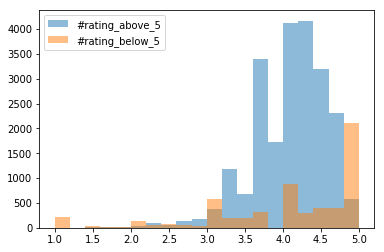

In [33]:
from matplotlib import pyplot

pyplot.hist(modeling_data[modeling_data['user_ratings_total']>5]['rating'],20, alpha=0.5, label='#rating_above_5')
pyplot.hist(modeling_data[modeling_data['user_ratings_total']<=5]['rating'], 20, alpha=0.5, label='#rating_below_5')
pyplot.legend(loc='upper left')
pyplot.show()

In [39]:
print("Total entry", len(modeling_data))
above_number_rating = modeling_data[(modeling_data['user_ratings_total']>5)]
above_number_rating['mean_rating_by_country'] = above_number_rating.groupby(['country'])['rating'].transform(np.mean)
above_number_rating['mean_rating_by_country_type'] = above_number_rating.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating)

Total entry 28306


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


22289

In [40]:
data_x = above_number_rating[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(22289, 26) (22289,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.2077135 , 4.26452703, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.2077135 , 4.26452703, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.2077135 , 4.26452703, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.16523136, 4.17355372, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.16523136, 4.17355372, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.16523136, 4.17355372, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(17831, 26) (4458, 26)


In [42]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.07860576264666996
[ 9.75187096e-04  9.90217998e-01  4.97713085e-03  4.81096315e-06
  5.46916591e-06  4.41085189e-05 -1.27422358e-02 -3.64798834e-03
  1.07221497e-02  5.66807437e-03 -1.25638714e-02 -1.97269761e-03
  1.77647993e-03 -7.43309447e-03 -1.38949835e-04 -2.00536655e-03
 -8.05051456e-04 -3.87951388e-03 -2.67568620e-03  1.84879092e-02
 -1.31430714e-03  1.91080742e-02 -6.82476510e-03 -1.08207757e-02
  4.87280537e-03  6.18881060e-03]
-0.022748003767024905
Linear regression MSE for the testing set 0.20969369986581565


In [43]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.2170514175066402
Mean value by Counrty and Type MSE for the testing set 0.20955932636358304


## Only include data with price rating

In [19]:
data_with_pricerate = modeling_data[modeling_data['price_level'].notna()]
data_with_pricerate['mean_rating_by_country'] = data_with_pricerate.groupby(['country'])['rating'].transform(np.mean)
data_with_pricerate['mean_rating_by_country_type'] = data_with_pricerate.groupby(['country', 'type'])['rating'].transform(np.mean)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data_x = data_with_pricerate[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                               'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = data_with_pricerate['rating'].values

type_onehot_encoded = oneHotEncoding(data_with_pricerate, 'type')
country_onehot_encoded = oneHotEncoding(data_with_pricerate, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)

(10929, 27) (10929,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8743, 27) (2186, 27)


In [22]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.11147900454263583
[ 8.76885341e-03  9.86620634e-01  1.28696244e-02  2.28031592e-02
 -7.67454301e-06  3.16433782e-06  3.55349754e-05 -1.20094027e-03
  4.18491793e-03 -1.50606929e-02  1.20767152e-02  6.12935607e-03
 -2.49356665e-02  5.01373525e-03  4.57826872e-03  1.67952814e-03
 -1.59211542e-02  3.97023478e-03 -1.96453315e-02  8.40765920e-03
  1.25334362e-02  2.36370385e-03  1.85361460e-02 -1.41765799e-02
 -1.44937094e-02  1.80631230e-02  7.89725022e-03]
-0.10419954952857147
Linear regression MSE for the testing set 0.19683153849334292


In [23]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.2070359704374252
Mean value by Counrty and Type MSE for the testing set 0.19677397409176312


## number of ratings above threshold and have price level

In [44]:
print("Total entry", len(modeling_data))
above_number_rating_pricelevel = modeling_data[(modeling_data['user_ratings_total']>10) & (modeling_data['price_level'].notna())]
above_number_rating_pricelevel['mean_rating_by_country'] = above_number_rating_pricelevel.groupby(['country'])['rating'].transform(np.mean)
above_number_rating_pricelevel['mean_rating_by_country_type'] = above_number_rating_pricelevel.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating_pricelevel)

Total entry 28306


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10297

In [45]:
data_x = above_number_rating_pricelevel[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating_pricelevel['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10297, 27) (10297,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.21217184, 4.28181818, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21217184, 4.28181818, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21217184, 4.28181818, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.19752212, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.19752212, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.19752212, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=7)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8237, 27) (2060, 27)


In [47]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
y_train_predict = linear_reg.predict(x_train)
print("Predicted MSE for training data: ", mean_squared_error(y_train, y_train_predict))
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.11657557880198464
[-1.40793372e-02  1.03935594e+00  9.59582620e-03  3.10360688e-02
 -1.77965682e-05  7.51851988e-06 -1.89609125e-05 -1.57219264e-02
 -3.89142886e-05  1.38315499e-03  1.43776857e-02  1.40643665e-02
 -6.07795552e-03  5.32076062e-03  2.53013870e-03 -9.95189222e-03
 -1.87948477e-03 -7.38748509e-03  2.24679098e-02 -1.15675675e-02
  2.24194601e-02 -4.85461001e-03  1.93945227e-02 -1.92556500e-02
 -3.17095186e-02  4.19171887e-03  2.29528640e-03]
-0.20721837581806657
Predicted MSE for training data:  0.15154658959348094
Linear regression MSE for the testing set 0.1530874951093957


In [48]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.16196749739129657
Mean value by Counrty and Type MSE for the testing set 0.15316161558326763


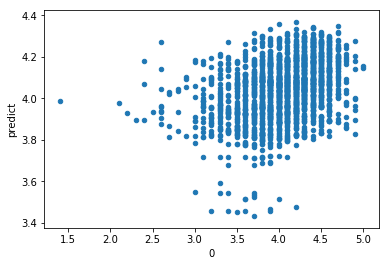

In [49]:
df = pd.DataFrame(y_test.T)
df['predict'] = pd.Series(y_predict)
df.plot.scatter(x=0, y='predict')

## above number of rating, have price level, rating above 2.5

In [50]:
print("Total entry", len(modeling_data))
above_number_rating_pricelevel = modeling_data[(modeling_data['user_ratings_total']>10) & (modeling_data['price_level'].notna())& (modeling_data['rating']>2.5)]
above_number_rating_pricelevel['mean_rating_by_country'] = above_number_rating_pricelevel.groupby(['country'])['rating'].transform(np.mean)
above_number_rating_pricelevel['mean_rating_by_country_type'] = above_number_rating_pricelevel.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating_pricelevel)

Total entry 28306


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10242

In [51]:
data_x = above_number_rating_pricelevel[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating_pricelevel['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10242, 27) (10242,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.21650718, 4.29618321, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21650718, 4.29618321, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21650718, 4.29618321, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.20053191, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.20053191, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.20053191, 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8193, 27) (2049, 27)


In [53]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
y_train_predict = linear_reg.predict(x_train)
print("Predicted MSE for training data: ", mean_squared_error(y_train, y_train_predict))
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.12786527611942378
[ 6.93050645e-03  9.58795541e-01  1.51002871e-02  3.27022693e-02
 -4.36855492e-05  6.41618678e-06  6.33474741e-06 -3.14661048e-03
  5.72354434e-03 -1.56227072e-02  1.30457733e-02  2.38146423e-03
 -1.15657220e-02  3.89404423e-04 -1.70405637e-04 -9.01553847e-04
 -2.41481559e-03  6.36473024e-03 -3.47155849e-02  7.54474698e-04
  1.46326729e-02 -1.10278996e-02  1.74169686e-02  9.10131246e-03
 -1.34027804e-02  1.33134415e-02  9.84429289e-03]
0.0012384941246343928
Predicted MSE for training data:  0.13415110448473158
Linear regression MSE for the testing set 0.13593111501465655


In [54]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.14465722895419209
Mean value by Counrty and Type MSE for the testing set 0.13599500360979225


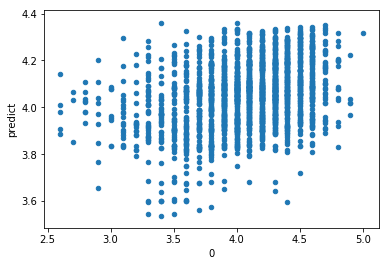

In [55]:
df = pd.DataFrame(y_test.T)
df['predict'] = pd.Series(y_predict)
df.plot.scatter(x=0, y='predict')

## KNN regressor

In [56]:
data_with_pricerate = modeling_data[modeling_data['price_level'].notna()]
data_with_pricerate['mean_rating_by_country'] = data_with_pricerate.groupby(['country'])['rating'].transform(np.mean)
data_with_pricerate['mean_rating_by_country_type'] = data_with_pricerate.groupby(['country', 'type'])['rating'].transform(np.mean)

data_x = data_with_pricerate[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level','user_ratings_total','distance_to_ikea']].values
data_y = data_with_pricerate['rating'].values

type_onehot_encoded = oneHotEncoding(data_with_pricerate, 'type')
country_onehot_encoded = oneHotEncoding(data_with_pricerate, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10929, 26) (10929,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. 

array([[4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8743, 26) (2186, 26)


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train) 

y_predict = knn_reg.predict(x_test)

print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

Linear regression MSE for the testing set 0.2443174748398902


In [59]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.2070359704374252
Mean value by Counrty and Type MSE for the testing set 0.19677397409176312


In [60]:
mean_squared_error(y_train, mean_by_country_train)

0.19449123089326806

In [61]:
mean_squared_error(y_train, mean_by_country_type_train)

0.18366370889853825